In [2]:
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0.040003,4.108190,9.999992e-07,-1.434974,-0.835088,8.702676e+00,1.0,1.0,1.0,4.0,1.0,0.0
1,0.000000,4.140377,5.841922e-01,0.000000,-1.517376,9.999995e-07,0.5,2.0,1.0,4.0,2.0,0.0
2,0.000000,4.119577,5.841922e-01,0.000000,-0.895270,9.999995e-07,0.5,2.0,1.0,2.0,2.0,0.0
3,0.040003,4.109626,9.999992e-07,-4.759610,-0.103159,9.999995e-07,0.5,2.0,3.0,4.0,1.0,0.0
4,0.000000,4.118499,9.999992e-07,-1.225015,-1.517376,9.999995e-07,0.5,2.0,3.0,1.0,2.0,0.0


In [6]:
X = df.drop(['Label-0/1'], axis = 1)
y = df['Label-0/1']

In [7]:
X.head()

,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight
0,0.040003,4.108190,9.999992e-07,-1.434974,-0.835088,8.702676e+00,1.0,1.0,1.0,4.0,1.0
1,0.000000,4.140377,5.841922e-01,0.000000,-1.517376,9.999995e-07,0.5,2.0,1.0,4.0,2.0
2,0.000000,4.119577,5.841922e-01,0.000000,-0.895270,9.999995e-07,0.5,2.0,1.0,2.0,2.0
3,0.040003,4.109626,9.999992e-07,-4.759610,-0.103159,9.999995e-07,0.5,2.0,3.0,4.0,1.0
4,0.000000,4.118499,9.999992e-07,-1.225015,-1.517376,9.999995e-07,0.5,2.0,3.0,1.0,2.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

In [11]:
rf_clf_2 = pickle.load(open("randomforest_model.sav",'rb'))

C:\Users\Sam\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Sam\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.3 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
sffs = SFS(rf_clf_2,
         k_features=(1,11),
         forward=True,
         floating=True,
         cv=0)

In [11]:
sffs.fit(X_train,y_train)

SequentialFeatureSelector(cv=0,
                          estimator=RandomForestClassifier(max_depth=100,
                                                           max_features='log2',
                                                           n_estimators=10),
                          floating=True, k_features=(1, 11),
                          scoring='accuracy')

In [12]:
sffs.k_feature_names_

('n_address',
 'gaussian_income',
 'gaussian_neighbors',
 'gaussian_weight',
 'gaussian_length',
 'log_count',
 'day_of_week',
 'quarter_number')

In [9]:
X_train_new = X_train[['n_address',
 'gaussian_income',
 'gaussian_neighbors',
 'gaussian_weight',
 'gaussian_length',
 'log_count',
 'day_of_week',
 'quarter_number']]

In [12]:
rf_clf_sffs = rf_clf_2.fit(X_train_new, y_train)

In [13]:
rf_preds_sffs = rf_clf_sffs.predict(X_train_new)

In [14]:
accuracy=accuracy_score(y_true = y_train, y_pred = rf_preds_sffs)
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 0.9915228913626156


In [15]:
recall_score_sffs = recall_score(y_true = y_train, y_pred = rf_preds_sffs)
print("Recall for our testing dataset",recall_score_sffs)

Recall for our testing dataset 0.9982882140366449


In [16]:
cm= confusion_matrix(y_train,rf_preds_sffs)

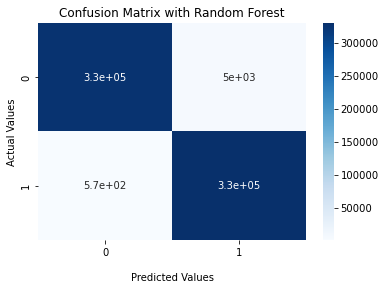

In [17]:
ax = sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set_title("Confusion Matrix with Random Forest")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values")
plt.show()

In [19]:
svm_clf_2 = pickle.load(open("svc_model.sav",'rb'))

In [20]:
sffs_svm = SFS(SVC(),
         k_features=(1,11),
         forward=True,
         floating=True,
         cv=0)

In [ ]:
sffs_svm.fit(X_train,y_train)

In [ ]:
sffs_svm.k_feature_names_

In [21]:
X_train_sffs = X_train[['n_address',
 'gaussian_income',
 'gaussian_neighbors',
 'gaussian_weight',
 'gaussian_length',
 'log_count',
 'day_of_week',
 'quarter_number']]

In [22]:
svm_clf_sffs = svm_clf_2.fit(X_train_sffs, y_train)

In [23]:
svm_preds_sffs = svm_clf_sffs.predict(X_train_sffs)

In [24]:
accuracy=accuracy_score(y_true = y_train, y_pred = svm_preds_sffs)
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 0.7171600705092603


In [25]:
recall_score_svm = recall_score(y_true = y_train, y_pred = svm_preds_sffs)
print("Recall for our testing dataset",recall_score_svm)

Recall for our testing dataset 0.5590022733242159


In [26]:
cm_svm= confusion_matrix(y_train,svm_preds_sffs)

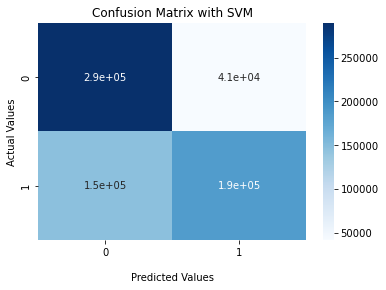

In [27]:
ax = sns.heatmap(cm_svm, annot = True, cmap = 'Blues')
ax.set_title("Confusion Matrix with SVM")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values")
plt.show()

In [28]:
filename = 'randomforest_model_sffs.sav'
pickle.dump(rf_clf_sffs, open(filename, 'wb'))

In [29]:
filename = 'svc_model_sffs.sav'
pickle.dump(svm_clf_sffs, open(filename, 'wb'))